In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## First make a shortcut of the folder "Medical Computer Vision" into your Google Drive
%cd /content/drive/MyDrive/MIT_Research/scripts
!ls -a

/content/drive/MyDrive/MIT_Research/scripts
2020_income_groups.csv				       final_automated_extraction_v2.csv
2024_02_22_automatic_extracted_data_exploration.ipynb  final_manual_extraction.csv
2024_05_21_automatic_extraction_standarized.csv        manual_extracted_data.csv
2024_05_21_consolidated_data_analysis.ipynb	       manual_extracted_data.xlsx
2024_05_21_consolidated_data.csv		       manual_extraction.csv
automated_extraction_v2.csv			       mitresearch.env
cv_research_data.ipynb				       retrieved_data.csv


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import geopandas as gpd

In [ ]:
df = pd.read_csv('final_automated_extraction_v2.csv')

In [ ]:
df.head()
df.columns

Index(['reviewers', 'title', 'authors', 'authors_count', 'concepts', 'doi',
       'research_org_countries', 'research_org_country_names', 'research_orgs',
       'times_cited', 'year', 'journal.title', 'database_name',
       'database_country', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [ ]:
import numpy as np

# Drop any unnamed columns (usually columns with names like 'Unnamed: x')
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df.drop(columns=unnamed_columns, inplace=True)

# Drop the 'reviewers' column safely
if 'reviewers' in df.columns:
    df.drop(columns=['reviewers'], inplace=True)

# Create 'first_author_country' and 'first_author_affiliation' columns with error handling
df['first_author_country'] = df['research_org_country_names']
df['first_author_affiliation'] = df['research_orgs']

In [ ]:
df.head()

,title,authors,authors_count,concepts,doi,research_org_countries,research_org_country_names,research_orgs,times_cited,year,journal.title,database_name,database_country,first_author_country,first_author_affiliation
0,COVID-19 detection using federated machine lea...,"[{'affiliations': [{'city': 'Banhā', 'city_id'...",3.0,"['federated machine', 'traditional machine', '...",10.1371/journal.pone.0252573,"[{'id': 'EG', 'name': 'Egypt'}]",['Egypt'],"[{'city_name': 'Giza', 'country_code': 'EG', '...",68.0,2021.0,PLOS ONE,"Chest X-ray (Covid-19 & Pneumonia), Novel Coro...","Global, Global",['Egypt'],[{'city_name': 'Giza'
2,MEDUSA: Multi-Scale Encoder-Decoder Self-Atten...,"[{'affiliations': [{'city': 'Waterloo', 'city_...",7.0,"['medical image analysis', 'self-attention mec...",10.3389/fmed.2021.821120,"[{'id': 'CA', 'name': 'Canada'}]",['Canada'],"[{'city_name': 'Hamilton', 'country_code': 'CA...",8.0,2022.0,Frontiers in Medicine,"COVID-Net CXR-2 benchmark dataset, Pneumonia D...","Global, USA, Global",['Canada'],[{'city_name': 'Hamilton'
3,AI-Assisted Tuberculosis Detection and Classif...,"[{'affiliations': [{'city': 'Manipal', 'city_i...",11.0,"['computer-aided detection', 'chest X-ray imag...",10.1155/2022/2399428,"[{'id': 'TH', 'name': 'Thailand'}, {'id': 'NP'...","['Nepal', 'Thailand', 'India', 'Mexico', 'Leba...","[{'acronym': 'UNINI', 'city_name': 'Campeche',...",19.0,2022.0,Computational Intelligence and Neuroscience,"TBX11 K, Montgomery, Shenzhen, National Instit...","Global, USA, China, India",['Nepal',[{'acronym': 'UNINI'
4,Predicting Patient Demographics From Chest Rad...,"[{'affiliations': [{'city': 'New York', 'city_...",7.0,"['deep learning models', 'artificial intellige...",10.1016/j.jacr.2022.06.008,"[{'id': 'US', 'name': 'United States'}]",['United States'],"[{'city_name': 'New York', 'country_code': 'US...",13.0,2022.0,Journal of the American College of Radiology,MIMIC-CXR,USA,['United States'],[{'city_name': 'New York'
5,A deep learning approach using effective prepr...,"[{'affiliations': [{'city': 'Dhaka', 'city_id'...",9.0,"['chest CT scan', 'COVID-19 cases', 'CT scan',...",10.1016/j.compbiomed.2021.105014,"[{'id': 'BD', 'name': 'Bangladesh'}, {'id': 'A...","['Australia', 'Bangladesh']","[{'acronym': 'USYD', 'city_name': 'Sydney', 'c...",56.0,2021.0,Computers in Biology and Medicine,"COVID-19 Radiography Database, Chest X-Ray Ima...","Global, China, Global",['Australia',[{'acronym': 'USYD'


In [ ]:
# Load the CSV file into a DataFrame
df_manual = pd.read_csv('final_manual_extraction.csv', index_col=0)

# Drop any unnamed columns (usually columns with names like 'Unnamed: x')
unnamed_columns = [col for col in df_manual.columns if 'Unnamed' in col]
df_manual.drop(columns=unnamed_columns, inplace=True)

# Drop rows with any NaN values
df_manual.dropna(inplace=True)

# Add a new column with a constant value
df_manual['extraction_type'] = 'manual'

# Display the first few rows of the DataFrame
df_manual.head()

,title,authors,authors_count,concepts,doi,research_org_country_names,first_author_country,last_author_country,research_orgs,first_author_institution,last_author_institution,times_cited,year,journal.title,database_name,database_country,extraction_type
reviewers,,,,,,,,,,,,,,,,,
Naira/Richard,4S-DT: Self-Supervised Super Sample Decomposit...,"Abbas, A.; Abdelsamea, M. M.; Gaber, M. M.",3.0,Deep CNN,10.1109/tnnls.2021.3082015,"Egypt, United Kingdom",Egypt,United Kingdom,"Department of Mathematics, University of Assiu...",University of Assiut,"School of Computing and Digital Technology, Bi...",66.0,2021.0,IEEE Trans Neural Netw Learn Syst,"Montgomery dataset, Japanese Society of Radiol...","United States, Japan, United States, Canada",manual
Naira/Richard,Chest X-ray pneumothorax segmentation using U-...,"Abedalla, A.; Abdullah, M.; Al-Ayyoub, M.; Ben...",4.0,U-Net,10.7717/peerj-cs.607,"Jordan, United Kingdom",Jordan,United Kingdom,"Computer Science, Jordan University of Science...",Jordan University of science and Technology,Staffordshire University,66.0,2021.0,PeerJ Comput Sci,SIIM-ACR Pneumothorax Segmentation,United States,manual
Naira/Richard,Classification of COVID-19 and Influenza Patie...,"Aftab, M.; Amin, R.; Koundal, D.; Aldabbas, H....",6.0,"LSTM, CNN",10.1155/2022/8549707,"Pakistan, India, Jordan, Saudi Arabia",Pakistan,Saudi Arabia,"Department of Computer Science, University of ...","University of Engineering and Technology,",Taif University,14.0,2022.0,Contrast Media Mol Imaging,Private Dataset,Pakistan,manual
Naira/Richard,Chexnet reimplementation for pneumonia detecti...,"Ahammad, S. H.; Rajesh, V.; Jafar Khan, P.; Su...",7.0,CNN,10.111/J.0975-2366,India,India,India,Koneru Lakshmaiah Education Foundation. Lakshm...,KL University,Indian Institute of Technology(IITH) Hyderabad,1.0,2020.0,International Journal of Pharmaceutical Research,ChestX-ray8,United States,manual
Naira/Richard,PENet: Continuous-Valued Pulmonary Edema Sever...,"Akbar, M. N.; Wang, X.; Erdogmus, D.; Dalal, S.",4.0,Siamese CNN,10.1109/embc48229.2022.9871153,United States,United States,United States,Dept. of Precision Diagnostics and Image Guide...,Philips Research North America,Philips Research North America,2.0,2022.0,Annu Int Conf IEEE Eng Med Biol Soc,"CXR, CheXpert, MIMIC-CXR","Unkown, United States, United States",manual


In [ ]:
df['extraction_type'] = 'manual'
df.head()

,title,authors,authors_count,concepts,doi,research_org_countries,research_org_country_names,research_orgs,times_cited,year,journal.title,database_name,database_country,first_author_country,first_author_affiliation,extraction_type
0,COVID-19 detection using federated machine lea...,"[{'affiliations': [{'city': 'Banhā', 'city_id'...",3.0,"['federated machine', 'traditional machine', '...",10.1371/journal.pone.0252573,"[{'id': 'EG', 'name': 'Egypt'}]",['Egypt'],"[{'city_name': 'Giza', 'country_code': 'EG', '...",68.0,2021.0,PLOS ONE,"Chest X-ray (Covid-19 & Pneumonia), Novel Coro...","Global, Global",['Egypt'],"[{'city_name': 'Giza', 'country_code': 'EG', '...",manual
1,Deep Convolutional Neural Networks for Chest D...,"[{'affiliations': [{'city': 'Mersin', 'city_id...",2.0,"['convolutional neural network', 'backpropagat...",10.1155/2018/4168538,"[{'id': 'TR', 'name': 'Turkey'}]",['Turkey'],NaN,228.0,2018.0,Journal of Healthcare Engineering,NIH ChestX-ray8 Database,USA,['Turkey'],NaN,manual
2,MEDUSA: Multi-Scale Encoder-Decoder Self-Atten...,"[{'affiliations': [{'city': 'Waterloo', 'city_...",7.0,"['medical image analysis', 'self-attention mec...",10.3389/fmed.2021.821120,"[{'id': 'CA', 'name': 'Canada'}]",['Canada'],"[{'city_name': 'Hamilton', 'country_code': 'CA...",8.0,2022.0,Frontiers in Medicine,"COVID-Net CXR-2 benchmark dataset, Pneumonia D...","Global, USA, Global",['Canada'],"[{'city_name': 'Hamilton', 'country_code': 'CA...",manual
3,AI-Assisted Tuberculosis Detection and Classif...,"[{'affiliations': [{'city': 'Manipal', 'city_i...",11.0,"['computer-aided detection', 'chest X-ray imag...",10.1155/2022/2399428,"[{'id': 'TH', 'name': 'Thailand'}, {'id': 'NP'...","['Nepal', 'Thailand', 'India', 'Mexico', 'Leba...","[{'acronym': 'UNINI', 'city_name': 'Campeche',...",19.0,2022.0,Computational Intelligence and Neuroscience,"TBX11 K, Montgomery, Shenzhen, National Instit...","Global, USA, China, India","['Nepal', 'Thailand', 'India', 'Mexico', 'Leba...","[{'acronym': 'UNINI', 'city_name': 'Campeche',...",manual
4,Predicting Patient Demographics From Chest Rad...,"[{'affiliations': [{'city': 'New York', 'city_...",7.0,"['deep learning models', 'artificial intellige...",10.1016/j.jacr.2022.06.008,"[{'id': 'US', 'name': 'United States'}]",['United States'],"[{'city_name': 'New York', 'country_code': 'US...",13.0,2022.0,Journal of the American College of Radiology,MIMIC-CXR,USA,['United States'],"[{'city_name': 'New York', 'country_code': 'US...",manual


In [ ]:
# Import necessary libraries (if not already imported)
import pandas as pd

# Cell 10: Concatenate DataFrames
df_concat = pd.concat([df_manual, df], ignore_index=True)

# Normalize journal names to ensure consistency
df_concat['journal.title'] = df_concat['journal.title'].str.upper()  # Convert to uppercase

# Display the concatenated DataFrame
df_concat.head()  # Optional: Check the output

,title,authors,authors_count,concepts,doi,research_org_country_names,first_author_country,last_author_country,research_orgs,first_author_institution,last_author_institution,times_cited,year,journal.title,database_name,database_country,extraction_type,research_org_countries,first_author_affiliation
0,4S-DT: Self-Supervised Super Sample Decomposit...,"Abbas, A.; Abdelsamea, M. M.; Gaber, M. M.",3.0,Deep CNN,10.1109/tnnls.2021.3082015,"Egypt, United Kingdom",Egypt,United Kingdom,"Department of Mathematics, University of Assiu...",University of Assiut,"School of Computing and Digital Technology, Bi...",66.0,2021.0,IEEE TRANS NEURAL NETW LEARN SYST,"Montgomery dataset, Japanese Society of Radiol...","United States, Japan, United States, Canada",manual,NaN,NaN
1,Chest X-ray pneumothorax segmentation using U-...,"Abedalla, A.; Abdullah, M.; Al-Ayyoub, M.; Ben...",4.0,U-Net,10.7717/peerj-cs.607,"Jordan, United Kingdom",Jordan,United Kingdom,"Computer Science, Jordan University of Science...",Jordan University of science and Technology,Staffordshire University,66.0,2021.0,PEERJ COMPUT SCI,SIIM-ACR Pneumothorax Segmentation,United States,manual,NaN,NaN
2,Classification of COVID-19 and Influenza Patie...,"Aftab, M.; Amin, R.; Koundal, D.; Aldabbas, H....",6.0,"LSTM, CNN",10.1155/2022/8549707,"Pakistan, India, Jordan, Saudi Arabia",Pakistan,Saudi Arabia,"Department of Computer Science, University of ...","University of Engineering and Technology,",Taif University,14.0,2022.0,CONTRAST MEDIA MOL IMAGING,Private Dataset,Pakistan,manual,NaN,NaN
3,Chexnet reimplementation for pneumonia detecti...,"Ahammad, S. H.; Rajesh, V.; Jafar Khan, P.; Su...",7.0,CNN,10.111/J.0975-2366,India,India,India,Koneru Lakshmaiah Education Foundation. Lakshm...,KL University,Indian Institute of Technology(IITH) Hyderabad,1.0,2020.0,INTERNATIONAL JOURNAL OF PHARMACEUTICAL RESEARCH,ChestX-ray8,United States,manual,NaN,NaN
4,PENet: Continuous-Valued Pulmonary Edema Sever...,"Akbar, M. N.; Wang, X.; Erdogmus, D.; Dalal, S.",4.0,Siamese CNN,10.1109/embc48229.2022.9871153,United States,United States,United States,Dept. of Precision Diagnostics and Image Guide...,Philips Research North America,Philips Research North America,2.0,2022.0,ANNU INT CONF IEEE ENG MED BIOL SOC,"CXR, CheXpert, MIMIC-CXR","Unkown, United States, United States",manual,NaN,NaN


In [ ]:
#df_concat.to_csv('./2024_05_21_consolidated_data.csv')

In [ ]:
!pip install python-dotenv
!pip install dimcli

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.7 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
#run api key
import dimcli
from dimcli.utils import dslquery_json as dslquery            # Changed .shortcuts to .utils
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import pandas as pd

# Load environment variables from .env
load_dotenv('mitresearch.env')
#print(os.getenv("DIMENSIONS_API_KEY"))


api_key = os.getenv("DIMENSIONS_API_KEY")
endpoint="https://app.dimensions.ai"

if api_key is None:
    raise ValueError("API key not found. Make sure to set DIMENSIONS_API_KEY in your .env file.")

dimcli.login(key=api_key, endpoint=endpoint)
dsl = dimcli.Dsl()


Dimcli - Dimensions API Client (v1.3)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.10
Method: manual login


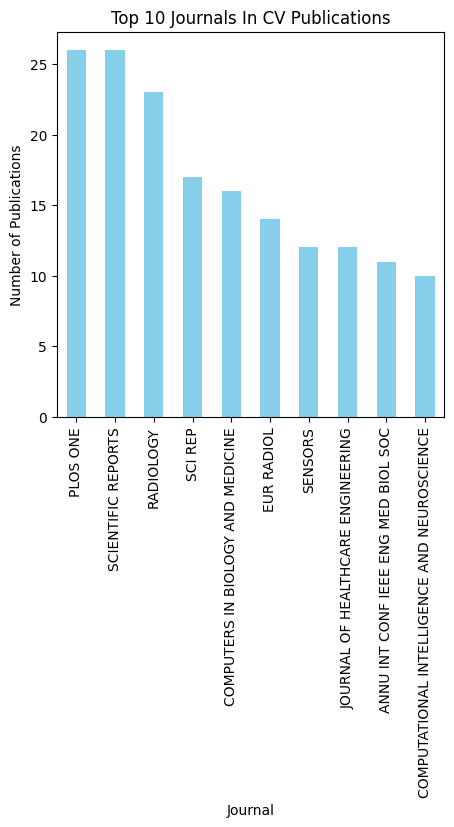

                                       Journal  Number of Publications
0                                     PLOS ONE                      26
1                           SCIENTIFIC REPORTS                      26
2                                    RADIOLOGY                      23
3                                      SCI REP                      17
4            COMPUTERS IN BIOLOGY AND MEDICINE                      16
5                                   EUR RADIOL                      14
6                                      SENSORS                      12
7            JOURNAL OF HEALTHCARE ENGINEERING                      12
8          ANNU INT CONF IEEE ENG MED BIOL SOC                      11
9  COMPUTATIONAL INTELLIGENCE AND NEUROSCIENCE                      10


In [ ]:
# Select top 10 journals
journal_counts = df_concat['journal.title'].value_counts()
top_journals = journal_counts.head(10)

# Plot
plt.figure(figsize=(5,5))
top_journals.plot(kind='bar', color='skyblue')
plt.title('Top 10 Journals In CV Publications')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.show()

# Display frequency in a table
top_journals_table = pd.DataFrame(top_journals.reset_index())
top_journals_table.columns = ['Journal', 'Number of Publications']
print(top_journals_table)

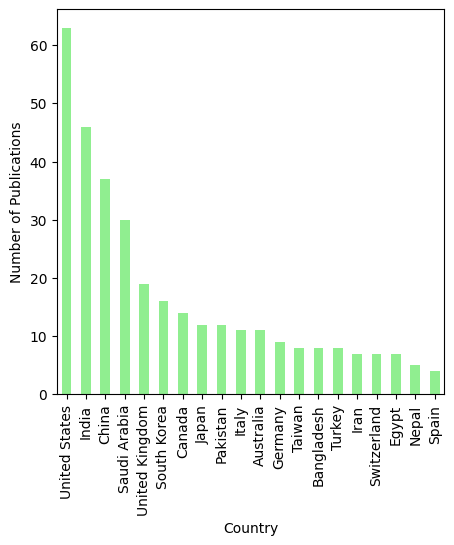

           Country  Number of Publications
0    United States                      63
1            India                      46
2            China                      37
3     Saudi Arabia                      30
4   United Kingdom                      19
5      South Korea                      16
6           Canada                      14
7            Japan                      12
8         Pakistan                      12
9            Italy                      11
10       Australia                      11
11         Germany                       9
12          Taiwan                       8
13      Bangladesh                       8
14          Turkey                       8
15            Iran                       7
16     Switzerland                       7
17           Egypt                       7
18           Nepal                       5
19           Spain                       4


In [ ]:
import ast

# Convert string representations of lists into actual lists
df['first_author_country'] = df['first_author_country'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Explode lists into individual rows
df = df.explode('first_author_country')

# Count occurrences of each country
country_counts = df['first_author_country'].value_counts()
top_countries = country_counts.head(20)

# Plot
plt.figure(figsize=(5,5))
top_countries.plot(kind='bar', color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Number of Publications')
plt.show()

# Display frequency in a table
top_countries_table = pd.DataFrame(top_countries.reset_index())
top_countries_table.columns = ['Country', 'Number of Publications']
print(top_countries_table)

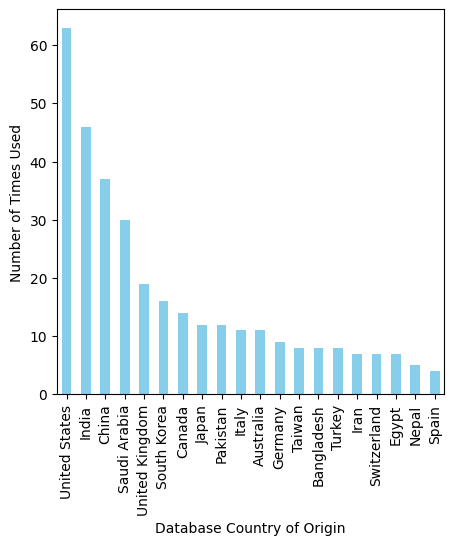

   Database Country  Uses
0     United States    63
1             India    46
2             China    37
3      Saudi Arabia    30
4    United Kingdom    19
5       South Korea    16
6            Canada    14
7             Japan    12
8          Pakistan    12
9             Italy    11
10        Australia    11
11          Germany     9
12           Taiwan     8
13       Bangladesh     8
14           Turkey     8
15             Iran     7
16      Switzerland     7
17            Egypt     7
18            Nepal     5
19            Spain     4


In [ ]:

plt.figure(figsize=(5, 5))
top_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Database Country of Origin')
plt.ylabel('Number of Times Used')
plt.show()

top_countries_table = pd.DataFrame(top_countries.reset_index())
top_countries_table.columns = ['Database Country', 'Uses']
print(top_countries_table)

In [ ]:
plt.figure(figsize=(10, 6), dpi=600)
sns.boxplot(x='income_group_first', y='authors_count', data=df_merge, showfliers=False,
            palette='Set2', hue='income_group_first')
plt.xlabel('Income Groups')
plt.ylabel('Number of Authors')
plt.show()

NameError: name 'df_merge' is not defined

<Figure size 6000x3600 with 0 Axes>